In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
import  numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:\Users\admin\Desktop\pca10.xlsx')
pd.set_option('display.max_rows', None)
df.head()

,contact_tracing,close_public_transport,international_travel_controls,cancel_public_events,public_information_campaigns,restriction_gatherings,restrictions_internal_movements,testing_policy,work_closure,School_Closure
0,1.0,1.25,2.25,2.0,2.0,2.0,1.25,1.0,1.75,3.0
1,1.0,2.00,3.25,2.0,2.0,2.0,2.00,1.0,2.00,3.0
2,1.0,2.00,4.00,2.0,2.0,2.0,2.00,1.0,2.00,3.0
3,1.0,2.00,4.00,2.0,2.0,2.0,2.00,1.0,2.00,3.0
4,1.0,2.00,4.00,2.0,2.0,2.0,2.00,1.0,2.00,3.0


In [3]:
fa = FactorAnalyzer(n_factors=10, rotation = 'varimax')

In [4]:
fa.fit(df)

FactorAnalyzer(n_factors=10, rotation='varimax', rotation_kwargs={})

In [5]:
loadings = fa.loadings_
loadings

array([[ 2.37518157e-02, -3.11365119e-02, -4.28988495e-02,
         1.13906210e-01,  4.96048911e-01,  5.03978923e-03,
         7.45305249e-02,  8.90933685e-03, -2.73893991e-03,
         0.00000000e+00],
       [ 2.39838462e-02,  2.63189592e-01,  5.41636911e-02,
        -1.43880693e-02,  7.43733945e-03,  4.71876216e-01,
         2.06505092e-02, -6.15942737e-02, -2.36324548e-04,
         0.00000000e+00],
       [-3.63964313e-03,  1.10063686e-01,  3.47090055e-02,
         5.44409529e-01,  1.30040803e-01, -1.05007991e-02,
        -2.37363352e-02,  4.05088439e-02,  6.14198866e-04,
         0.00000000e+00],
       [ 7.88493649e-01,  5.24514466e-03,  3.91705912e-02,
         1.06509176e-01,  9.14263315e-03,  1.40808138e-01,
         1.90904567e-01, -1.38954299e-01, -4.23871754e-02,
         0.00000000e+00],
       [ 1.32236644e-01,  2.49401913e-02,  5.08439722e-01,
         3.72470361e-02, -4.70058504e-02,  4.60668860e-02,
         6.15265430e-02,  1.36328152e-02, -1.67134632e-03,
         0.

In [6]:
ev, v = fa.get_eigenvalues()

In [7]:
xvals = range(1, df.shape[1]+1)

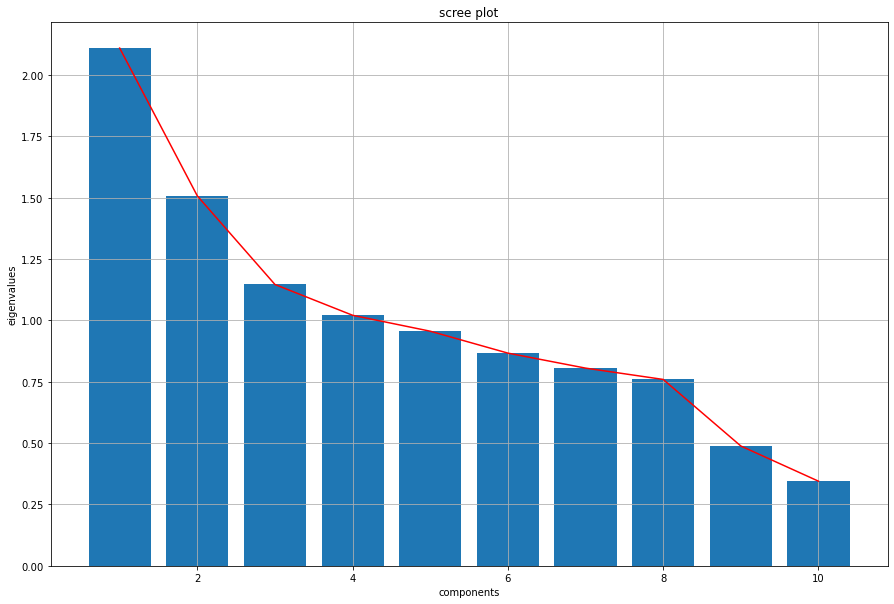

In [8]:
plt.figure(figsize = (15,10))
#for index, value in enumerate(ev):
#    plt.text(index, value, str(round(value, 2)), va = 'bottom', ha = 'center', fontsize = 15)
plt.bar(xvals, ev)
plt.plot(xvals, ev, c = 'red')
plt.xlabel('components')
plt.ylabel('eigenvalues')
plt.title('scree plot')
plt.grid()
plt.show()

In [9]:
scaler = MinMaxScaler()
x = scaler.fit_transform(df)
x

array([[0.5       , 0.625     , 0.5625    , ..., 0.33333333, 0.58333333,
        1.        ],
       [0.5       , 1.        , 0.8125    , ..., 0.33333333, 0.66666667,
        1.        ],
       [0.5       , 1.        , 1.        , ..., 0.33333333, 0.66666667,
        1.        ],
       ...,
       [0.5       , 0.5       , 0.75      , ..., 0.        , 1.        ,
        1.        ],
       [0.5       , 0.5       , 0.75      , ..., 0.        , 1.        ,
        1.        ],
       [0.5       , 0.5       , 0.75      , ..., 0.        , 1.        ,
        1.        ]])

In [10]:
pca = PCA(n_components=4)
pc = pca.fit_transform(x)
pc[:, 0]

array([-0.31236403, -0.63420211, -0.63916856, ...,  0.38728306,
        0.32518469, -0.10950386])

In [ ]:
plt.figure(figsize = (30,30))
cov = np.cov(df)
#print(np.round(cov[:5, :]))
sns.heatmap(cov, annot = True)
plt.show()

In [11]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
per_var

array([24.5, 15.7, 14. , 13.3])

In [12]:
labels = ['PC'+str(i) for i in range(1, len(per_var)+1)]
labels

['PC1', 'PC2', 'PC3', 'PC4']

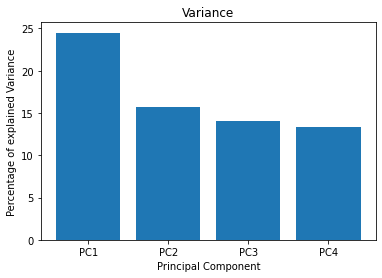

In [13]:
plt.bar(x= range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.xlabel("Principal Component")
plt.ylabel("Percentage of explained Variance")
plt.title("Variance")
plt.show()

In [14]:
dff = pd.read_excel(r'C:\Users\admin\Desktop\country.xlsx')
dff

,country
0,Albania(w1)
1,Albania(w1)
2,Albania(w1)
3,Albania(w1)
4,Albania(w1)
5,Albania(w1)
6,Albania(w1)
7,Albania(w1)
8,Albania(w1)
9,Albania(w1)


In [15]:
#pca_df = pd.DataFrame(pc, index= dff['country'], columns = labels)

In [16]:
pca_values = pca.components_

In [17]:
columns = df.columns.values
colors = ['blue', 'red', 'green', 'black', 'purple', 'brown', 'maroon', 'olive', 'lime', 'magenta']
if len(pca_values[0]) > 6:
    colors=colors*(int(len(pca_values[0])/6)+1)

Text(0, 0.5, 'PC2 - 15.7%')

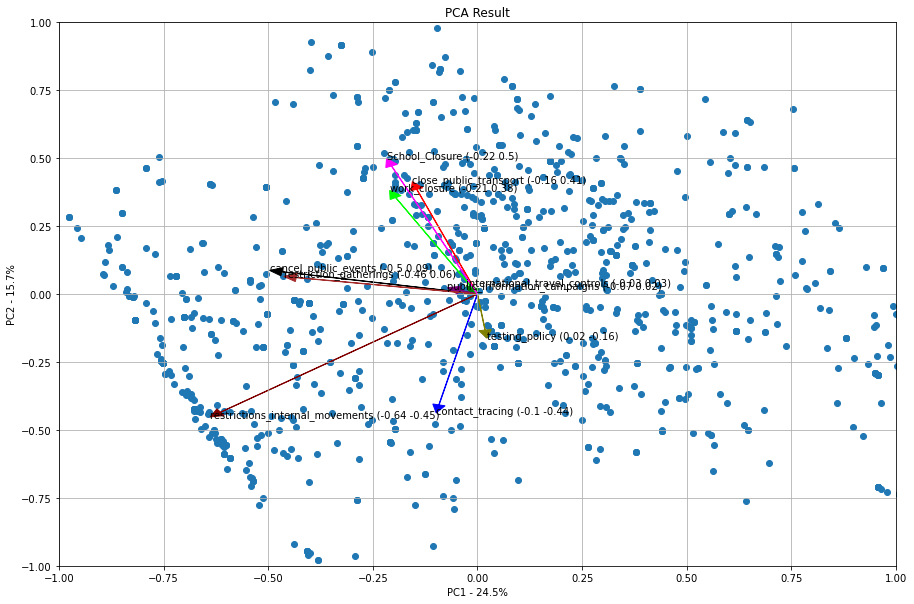

In [18]:
plt.figure(figsize = (15,10))
#for i, txt in enumerate(dff['country']):
#    plt.annotate(txt, (pc[:, 0][i], pc[:, 1][i]))
plt.scatter(pc[:, 0], pc[:, 1])

for i in range(len(pca_values[0])):
    xi=pca_values[0][i]
    yi=pca_values[1][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.03, head_length=0.03, 
              color=colors[i], length_includes_head=True)
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(pca_values[0, i], 
             pca_values[1, i] , 
             s=columns[i] + add_string )
plt.title("PCA Result")
plt.xlim(-1, 1)
plt.grid(True)
plt.ylim(-1, 1)
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))

Text(0, 0.5, 'PC3 - 14.0%')

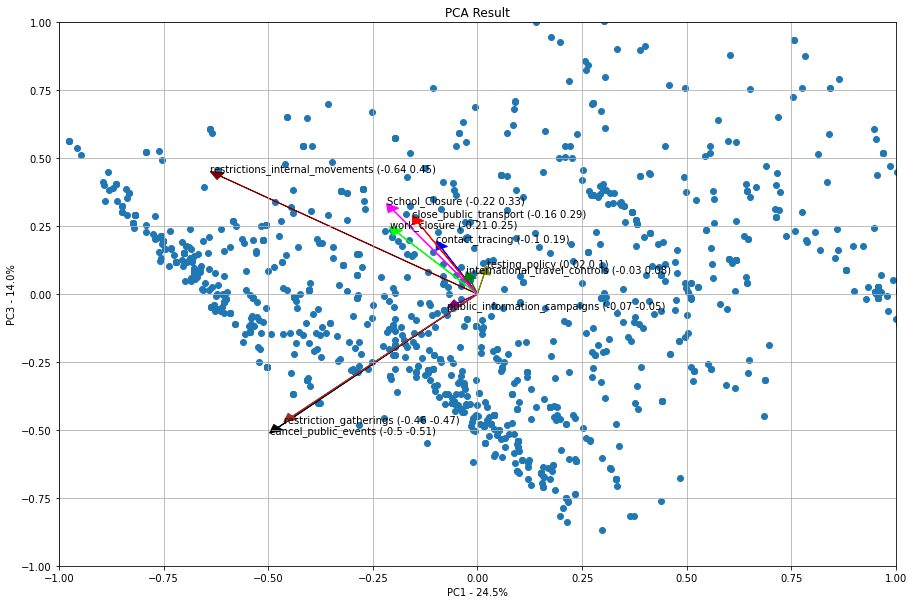

In [19]:
%matplotlib inline
plt.figure(figsize = (15,10))
#for i, txt in enumerate(dff['country']):
#    plt.annotate(txt, (pc[:, 0][i], pc[:, 1][i]))
plt.scatter(pc[:, 0], pc[:, 2])

for i in range(len(pca_values[0])):
    xi=pca_values[0][i]
    yi=pca_values[2][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.03, head_length=0.03, 
              color=colors[i], length_includes_head=True)
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(pca_values[0, i], 
             pca_values[2, i] , 
             s=columns[i] + add_string )
plt.title("PCA Result")
plt.xlim(-1, 1)
plt.grid(True)
plt.ylim(-1, 1)
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC3 - {0}%".format(per_var[2]))

Text(0, 0.5, 'PC3 - 14.0%')

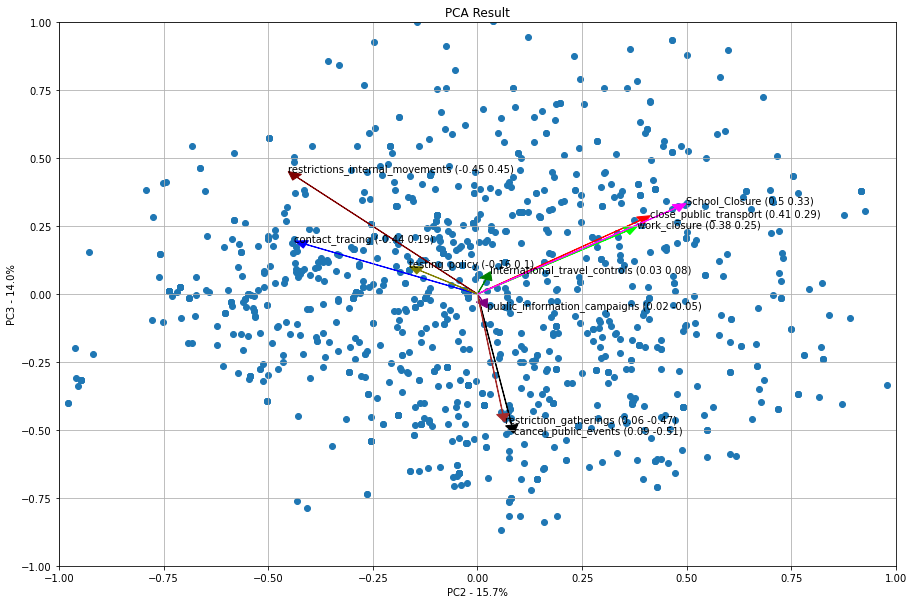

In [20]:
plt.figure(figsize = (15,10))
#for i, txt in enumerate(dff['country']):
#    plt.annotate(txt, (pc[:, 0][i], pc[:, 1][i]))
plt.scatter(pc[:, 1], pc[:, 2])

for i in range(len(pca_values[0])):
    xi=pca_values[1][i]
    yi=pca_values[2][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.03, head_length=0.03, 
              color=colors[i], length_includes_head=True)
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(pca_values[1, i], 
             pca_values[2, i] , 
             s=columns[i] + add_string )
plt.title("PCA Result")
plt.xlim(-1, 1)
plt.grid(True)
plt.ylim(-1, 1)
plt.xlabel("PC2 - {0}%".format(per_var[1]))
plt.ylabel("PC3 - {0}%".format(per_var[2]))